In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import umap

# import sys
# sys.path.append("../profiling/")
# import profiling

/home/alonshp/.conda/envs/pytorch_ads/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# INPUT_PROFILES = "well_level_data_efn128combinedplatesout_conv6a_1e-2_e30.csv"

In [3]:
# wells = pd.read_csv(INPUT_PROFILES)
# num_features = max([int(x) for x in wells.columns if x.isdigit()]) + 1
# columns2 = [str(i) for i in range(num_features)]

In [4]:
# treatment_level = wells.groupby(["pert_name","broad_sample"]).mean().reset_index()

In [5]:
# matches_official_file = "./data/TAORF_MOA_MATCHES_official.csv"
# moas = pd.read_csv(matches_official_file)

In [6]:
# annotated_treatments = pd.merge(treatment_level, moas, left_on=['broad_sample'], right_on=["Var1"])
# annotated_treatments.rename(columns = {'Metadata_moa.x': 'Metadata_moa', 'Metadata_Plate_Map_Name.x':'Metadata_Plate_Map_Name' }, inplace=True)

In [7]:
import sys, os
import pandas as pd
from datetime import date
# import matplotlib.style as style
# style.use('seaborn-colorblind')
# style.use('Set2')

pd.get_option("display.max_rows",100)
'''/home/alonshp/.conda/envs/tf-env/bin/python'''

sys.path.append(os.path.abspath('../'))
print(sys.path)

# from ads.utils.percantage_replicates_utils import *
# from ads.utils.plotting import *
# from ads.utils.constants import *
# from constants import *
# from metrics import *
# sys.path.append(os.path.abspath('../'))
# print(sys.path)

['/sise/home/alonshp/AnomalyDetectionScreening/1.evaluate_screen', '/sise/home/alonshp/AnomalyDetectionScreening/1.evaluate_screen', '/home/alonshp/AnomalyDetectionScreening/ads', '/home/alonshp/.conda/envs/pytorch_ads/lib/python310.zip', '/home/alonshp/.conda/envs/pytorch_ads/lib/python3.10', '/home/alonshp/.conda/envs/pytorch_ads/lib/python3.10/lib-dynload', '', '/home/alonshp/.conda/envs/pytorch_ads/lib/python3.10/site-packages', '/sise/home/alonshp/AnomalyDetectionScreening']


# Load data

In [8]:
# ds_info_dict={'CDRP':['CDRP-BBBC047-Bray',['Metadata_Sample_Dose','pert_sample_dose']],
#               'CDRP-bio':['CDRPBIO-BBBC036-Bray',['Metadata_Sample_Dose','pert_sample_dose']],
#               'TAORF':['TA-ORF-BBBC037-Rohban',['Metadata_broad_sample','pert_id',]],
#               'LUAD':['LUAD-BBBC041-Caicedo',['x_mutation_status','allele']],
#               'LINCS':['LINCS-Pilot1',['Metadata_pert_id_dose','pert_id_dose']]}

# ################################################
# # dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
# # datasets=['LUAD','TAORF','LINCS','CDRP-bio'];
# # datasets=['LINCS', 'CDRP-bio','CDRP'];
# # datasets=['TAORF','LUAD','LINCS', 'CDRP-bio']
# datasets=['CDRP-bio']
# # DT_kfold={'LUAD':10, 'TAORF':5, 'LINCS':25, 'CDRP-bio':6,'CDRP':40}



# # from IPython.display import clear_output
# ################################################
# # CP Profile Type options: 'augmented', 'augmented_after_fs' , 'normalized', 'normalized_variable_selected'
# profileType='augmented'
# profileType ='normalized_variable_selected'
# # profileType='augmented_after_fs'

# base_dir= '/sise/assafzar-group/assafzar/genesAndMorph'
# data_dir=base_dir+'/preprocessed_data/'+ds_info_dict[datasets[0]][0]+'/'
# output_dir = f'{base_dir}/anomaly_output/{datasets[0]}/{profileType}'  
# save_base_dir = f'{base_dir}/results/{datasets[0]}/{profileType}/'
# exp_save_dir = f'{save_base_dir}/{date}'
# exp_name= 'autoencoder'

# os.makedirs(save_base_dir,exist_ok=True)
# os.makedirs(exp_save_dir,exist_ok=True)


# methods_info_dicts = {
#     # '4to1':{'path':f'/storage/users/g-and-n/tabular_models_results/41/ALL/zscores'},
#     # '2to1':{'path':f'/storage/users/g-and-n/tabular_models_results/21/ALL/zscores'},
#     'anomaly':{'name':'anomaly','path':os.path.join(output_dir,'out_ad_treated_zscores.csv')},
#     'raw':{'name':'raw','path': os.path.join(output_dir,'input_data_test_treated_zscores_by_test.csv')},
#     # '5to5':{'path':f'/storage/users/g-and-n/tabular_models_results/55/ALL/zscores'},
# }

ds_info_dict={'CDRP':['CDRP-BBBC047-Bray',['Metadata_Sample_Dose','pert_sample_dose']],
              'CDRP-bio':['CDRPBIO-BBBC036-Bray',['Metadata_Sample_Dose','pert_sample_dose']],
              'TAORF':['TA-ORF-BBBC037-Rohban',['Metadata_broad_sample','pert_id',]],
              'LUAD':['LUAD-BBBC041-Caicedo',['x_mutation_status','allele']],
              'LINCS':['LINCS-Pilot1',['Metadata_pert_id_dose','pert_id_dose']]}

################################################
# dataset options: 'CDRP' , 'LUAD', 'TAORF', 'LINCS', 'CDRP-bio'
# datasets=['TAORF','LUAD','LINCS', 'CDRP-bio']
datasets=['CDRP-bio']
# datasets=['LINCS']
dataset= datasets[0]
# DT_kfold={'LUAD':10, 'TAORF':5, 'LINCS':25, 'CDRP-bio':6,'CDRP':40}
exp_name = 'report_911_t'
by_dose = False
normalize_by_all = False
# from IPython.display import clear_output
################################################
# CP Profile Type options: 'augmented', 'augmented_after_fs' , 'normalized', 'normalized_variable_selected'
profileType='augmented'
# profileType ='normalized_variable_selected'

z_trim = 10
t_thresholds = [2]


In [9]:
from utils.general import add_exp_suffix

exp_suffix = add_exp_suffix(profileType,by_dose,normalize_by_all)

base_dir= '/sise/assafzar-group/assafzar/genesAndMorph'

data_dir=base_dir+'/preprocessed_data/'+ds_info_dict[datasets[0]][0]+'/'
output_dir = f'{base_dir}/anomaly_output/{datasets[0]}/{profileType}'  
output_dir = f'{base_dir}/anomaly_output/{datasets[0]}/CellPainting/{exp_name}'  
save_base_dir = f'{base_dir}/results/{datasets[0]}'
res_dir = f'{save_base_dir}/CellPainting/{exp_name}/'
exp_save_dir = f'{res_dir}/figs/PR'
# exp_name= 'autoencoder'
methods = {
    # '4to1':{'path':f'/storage/users/g-and-n/tabular_models_results/41/ALL/zscores'},
    # '2to1':{'path':f'/storage/users/g-and-n/tabular_models_results/21/ALL/zscores'},
    # 'anomaly':{'name':'anomaly','path':os.path.join(output_dir,f'replicate_level_cp_{profileType}_ae.csv')},
    'anomaly_err':{'name':'anomaly_err','path':os.path.join(output_dir,f'replicate_level_cp_{profileType}_ae_diff.csv')},
    # 'anomaly_emb':{'name':'anomaly_emb','path':os.path.join(output_dir,f'replicate_level_cp_{profileType}_ae_embeddings.csv')},
    'raw':{'name':'raw','path': os.path.join(output_dir,f'replicate_level_cp_{profileType}_baseline.csv')},
    'raw_unchanged':{'name':'raw_unchanged','path': os.path.join(data_dir,'CellPainting',f'replicate_level_cp_{profileType}.csv.gz')}
    # '5to5':{'path':f'/storage/users/g-and-n/tabular_models_results/55/ALL/zscores'},
}


p_vals_path = f'{res_dir}/df_null_p_vals{exp_suffix}.csv'
pr_path = f'{res_dir}/pr{exp_suffix}.csv'

os.makedirs(save_base_dir,exist_ok=True)
os.makedirs(exp_save_dir,exist_ok=True)

In [10]:
# methods_for_testing = ['anomaly','raw']

# methods = {}
# for m in methods_for_testing:
#     methods[m] = methods_info_dicts[m]

In [11]:
new_ss = False
ss_calc = 'median'

if by_dose:
    ind_col = 'dose_col'
else:
    ind_col = 'cpd_col'

In [12]:
# from ads.utils.data_utils import set_index_fields
# from dataset_paper_repo.utils.normalize_funcs import standardize_per_catX
from utils.global_variables import DS_INFO_DICT
from utils.eval_utils import load_zscores

methods = load_zscores(methods,base_dir,dataset,profileType,by_dose=by_dose,normalize_by_all =normalize_by_all,z_trim=z_trim,sample='mock')
# (methods,base_dir,dataset, profile_type,normalize_by_all=False,by_dose=False,z_trim=10)
####################### loading zscores #########################

for m in methods.keys():
       
    methods[m]['ind_col'] = DS_INFO_DICT[dataset][methods[m]['modality']][ind_col]


loading zscores for method: anomaly_err
loading zscores for method: raw
loading zscores for method: raw_unchanged


In [13]:
for m in methods.keys():
    print(methods[m]['zscores'].shape)

(17594, 425)
(17594, 425)
(17594, 1783)


# Well-level UMAP

In [14]:
reducer = umap.UMAP(n_neighbors=15, n_components=2)
embeddings = reducer.fit_transform(wells[columns2])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), wells.reset_index()), axis=1)

NameError: name 'wells' is not defined

In [ ]:
aux["Control"] = ""
aux.loc[aux["pert_name"] == "EMPTY_", "Control"] = "Control"
aux.loc[aux["pert_name"] != "EMPTY_", "Control"] = "Replicate"

In [ ]:
trt_embb = reducer.transform(annotated_treatments[columns2])
main = pd.concat((pd.DataFrame(trt_embb, columns=["X","Y"]), annotated_treatments), axis=1)

[(4, 16)]

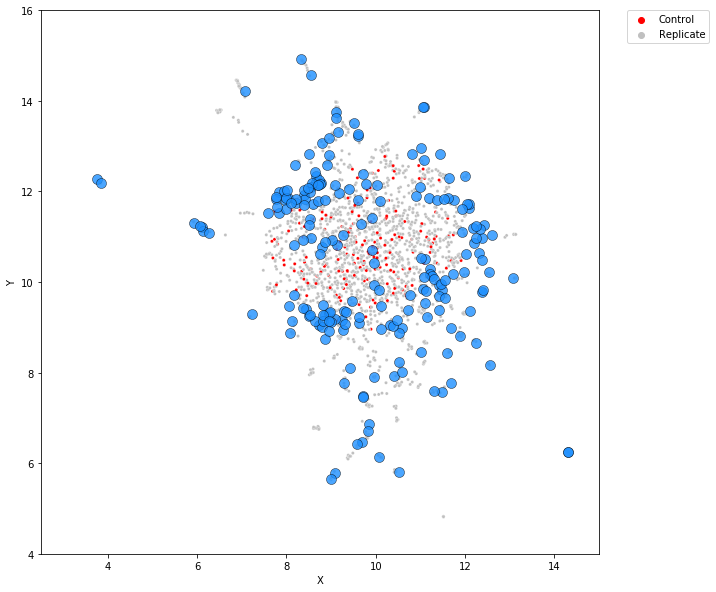

In [ ]:
plt.figure(figsize=(10,10))
g = sb.scatterplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["red", "silver"])
h = sb.scatterplot(data=main, x="X", y="Y", s=100, color="dodgerblue", linewidth=0.5, edgecolor="black", alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
x_lims = (None, None)
y_lims = (None, None)
# g.set(xlim=x_lims)
# g.set(ylim=y_lims)

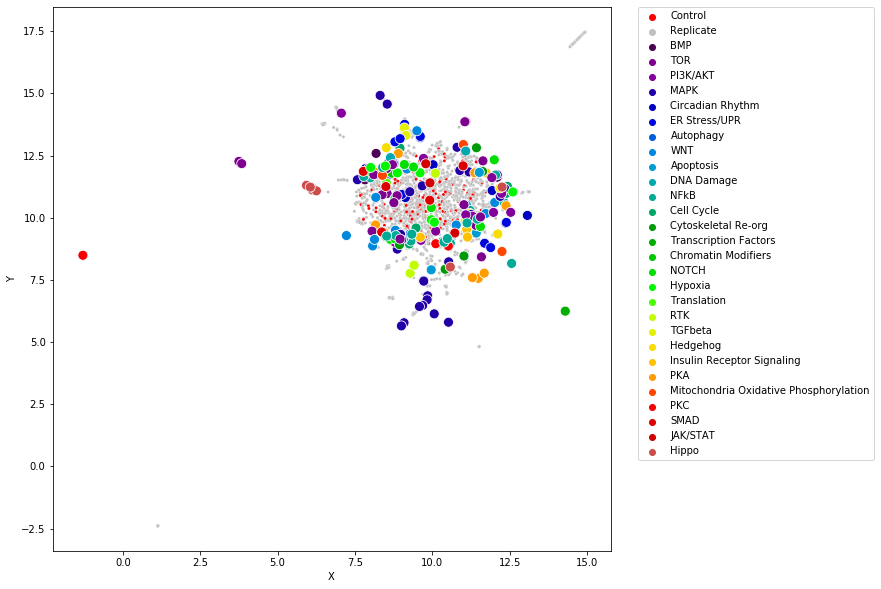

In [ ]:
plt.figure(figsize=(10,10))
g = sb.scatterplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["red", "silver"])
h = sb.scatterplot(data=main, x="X", y="Y", s=100, hue="Metadata_moa", palette="nipy_spectral")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

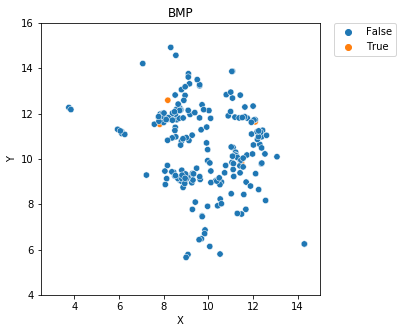

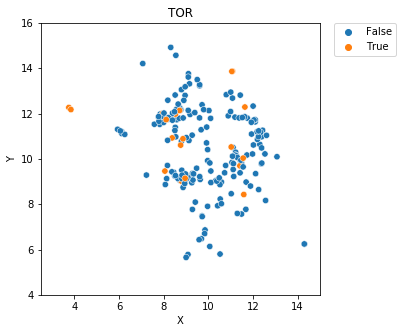

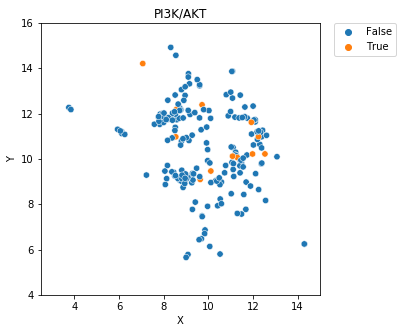

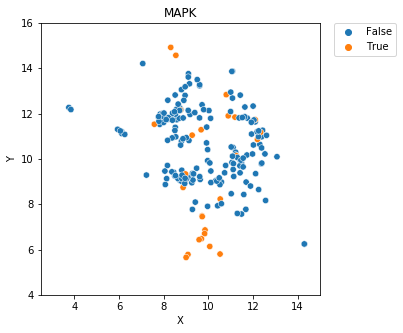

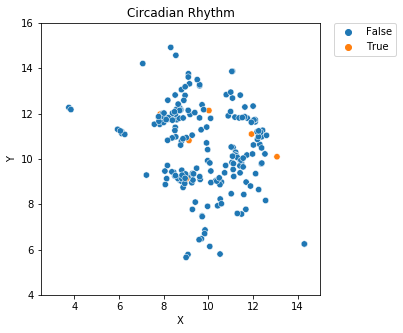

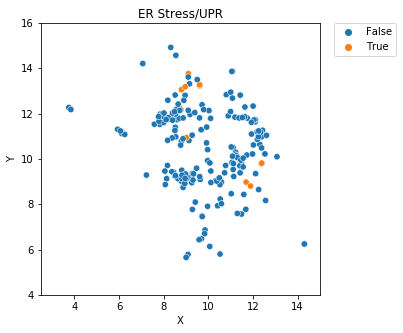

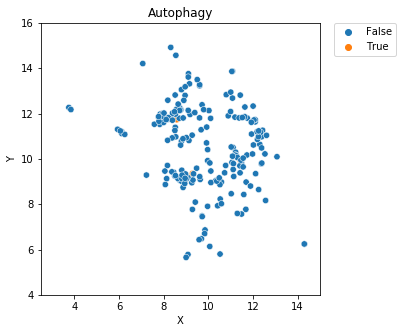

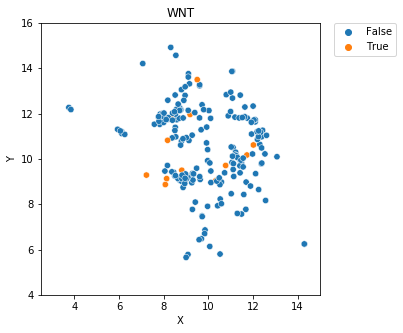

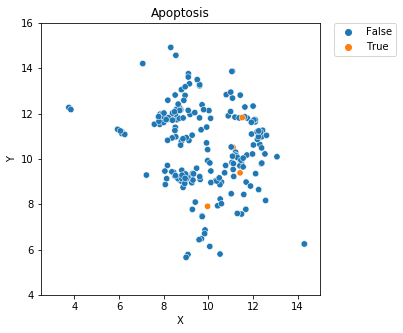

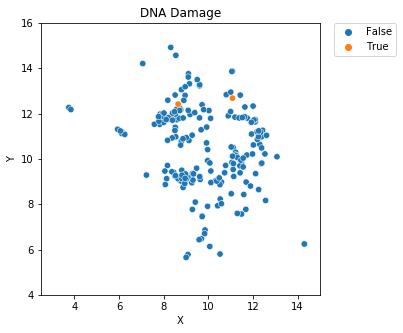

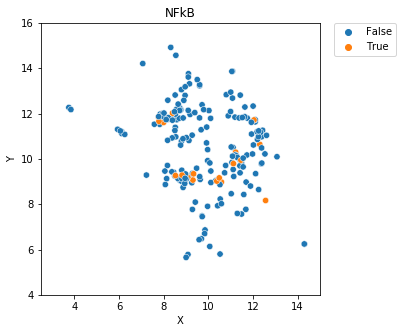

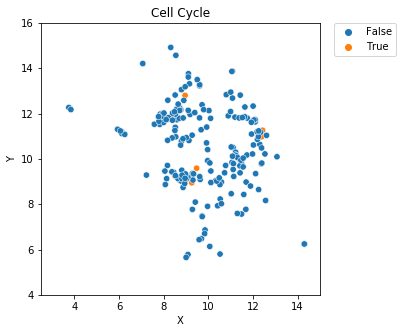

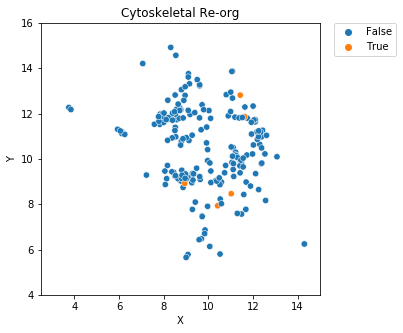

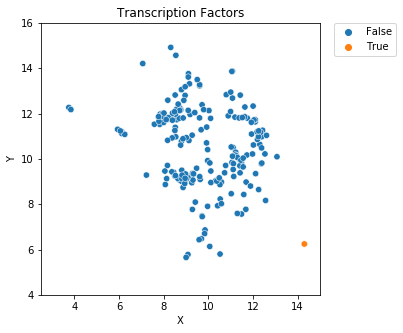

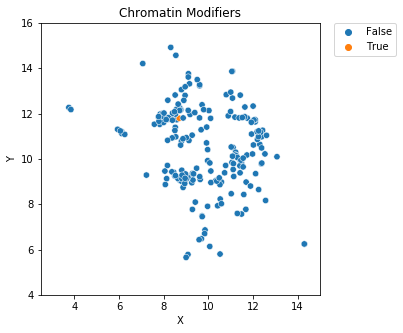

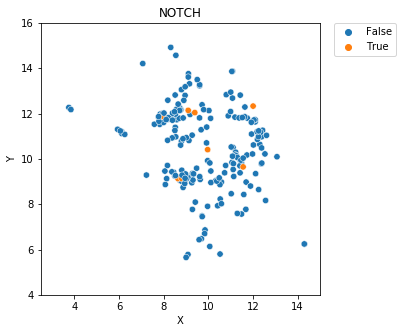

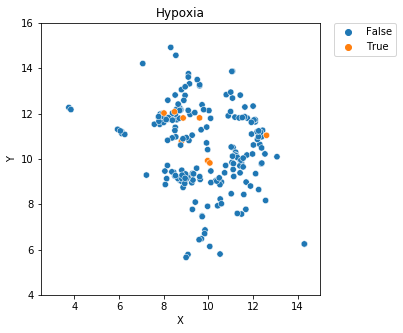

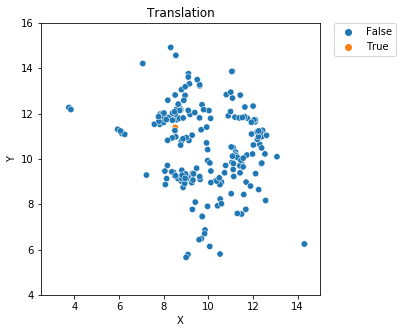

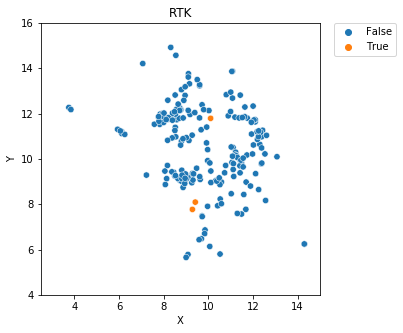

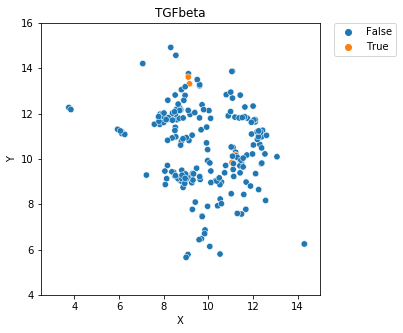

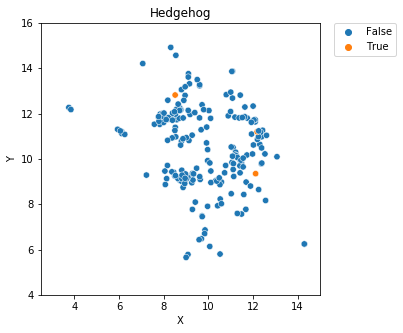

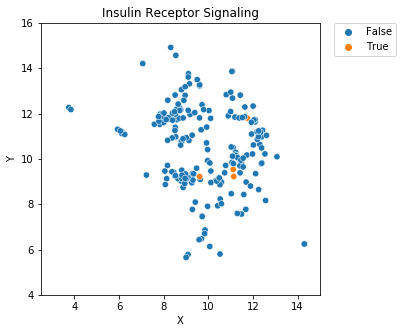

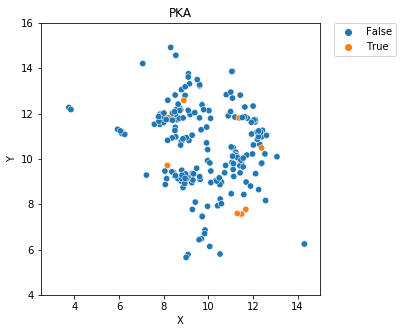

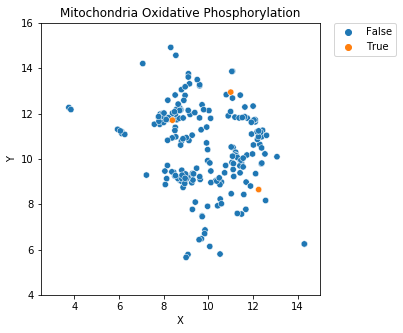

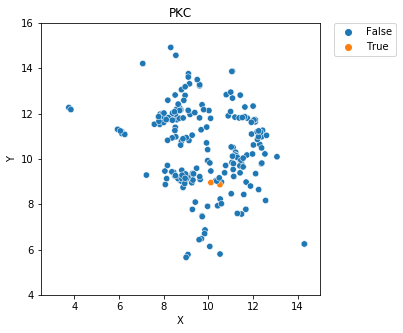

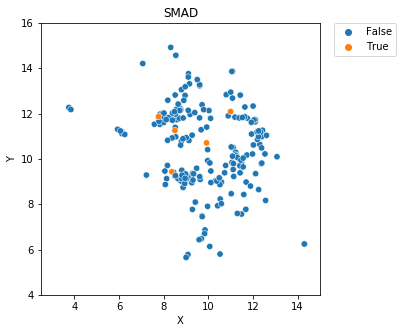

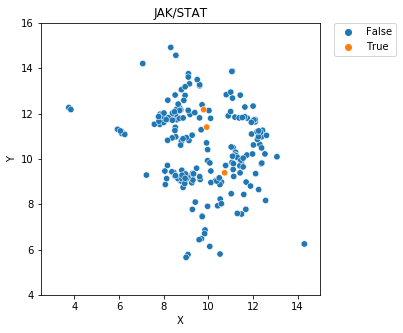

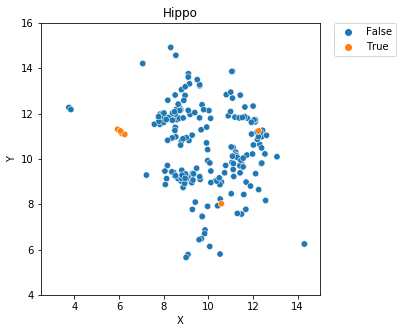

In [ ]:
main["Display"] = False
for moa in main.Metadata_moa.unique():
    main.Display = main.Metadata_moa == moa
    plt.figure(figsize=(5,5))
    g = sb.scatterplot(data=main, x="X", y="Y", s=40, hue="Display")
    g.set(title=moa)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

# Treatment-level correlations

In [ ]:
X, Y = profiling.load_correlation_matrix("data/mixed_validation_matrix.csv")

/home/jupyter-jcaicedo@broadinst-d9764/.local/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


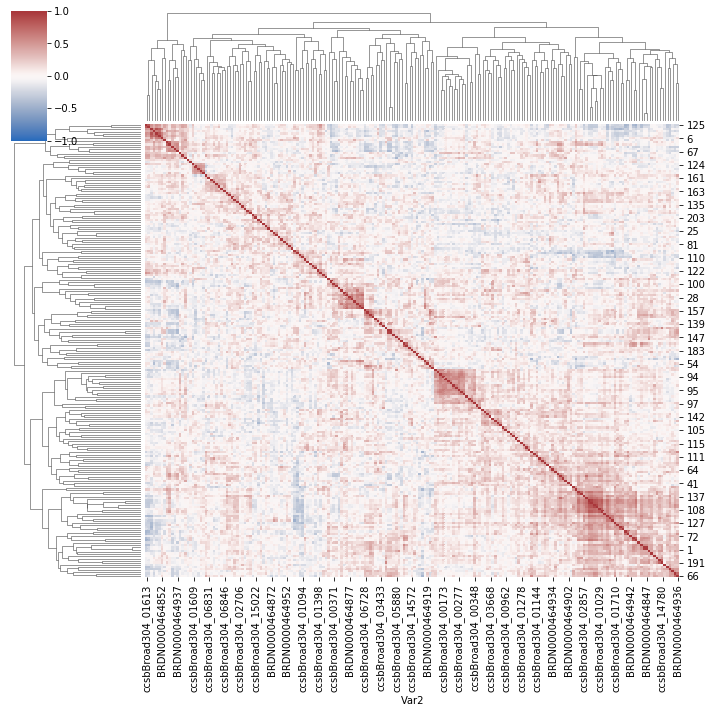

In [ ]:
sb.clustermap(X[Y.Var1], cmap="vlag", vmin=-1, vmax=1)